<a href="https://colab.research.google.com/github/nonu0/django/blob/main/master_lesson_SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python intro using google colab**

> Dr. Simon Appeltans
UHasselt-DSI
Simon.appeltans@uhasselt.be

# **Example application in Python** 
**Exercise P1.** We will calculate the amount of crop cover,which is a bit simpler than the normally used LAI (Leaf Area Index). It's an important difference to note: the crop cover is the amount of crop area as seen from above, compared to the entire area that we see. The LAI, which is an index used to assess crop productivity, is calculated as the area of green leaves of a plant occupying a given ground surface area (LAI = leaf area / ground area). The maximum value of the crop cover is therefore 1, when the canopy completely covers the ground when viewed from above. The minimum value is 0, when there are no leaves. However, the LAI value can increase to be more than one, when several leaves are situated on top of each other, so that a certain m2 of soil has a higher m2 of leaves (thing of a tree, or Maize plant). 

In [ ]:
#Load the data (clone from github)
!git clone https://github.com/apolo-apolo/datos.git

fatal: destination path 'datos' already exists and is not an empty directory.


In [2]:
#Importo las librerías necesarias
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import colorbar 
import numpy as np
%matplotlib inline   

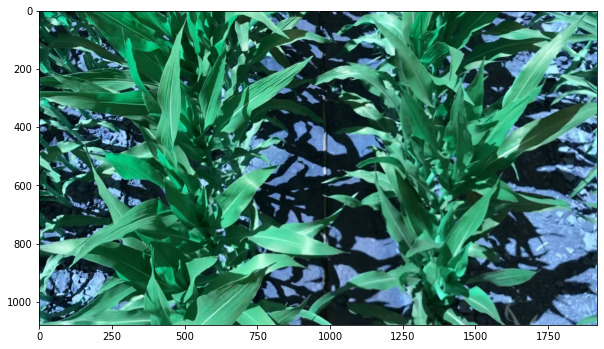

In [3]:
imagen = cv2.imread("/content/datos/image_1.jpg")#make sure this is the right path to your data
plt.figure(figsize = (10,20))
plt.imshow(imagen)

#note that openCV reads images in the BRG order, meaning the bands are switched compared to our normal view, 
#and this is why the soil here looks blue. 
#we use openCV here because it's convenient, but we can also use other packages in python

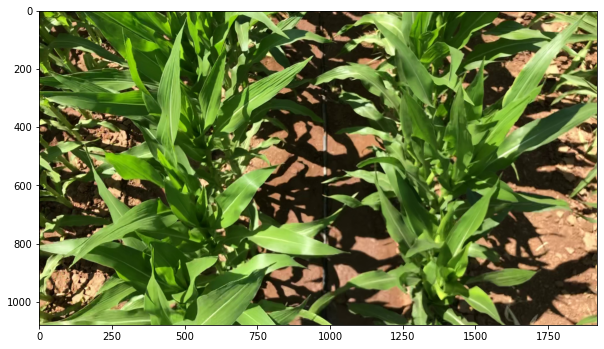

In [4]:
#so now we will transform the image to be have the bands in the right order
transformada = (cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.figure( figsize = (10,20))
figurai = plt.gcf()
plt.imshow(transformada)

#if you want, you can save the image as well, in different formats if you want
#figurai.savefig('T11_EJES.pdf')

In [5]:
#Python functions can often be used in more ways than one, since python is an 'object oriented
#programming language'. An example is shown below, but for more information, look into
#other python tutorialst 
dimensions = imagen.shape
print(dimensions) #Explica resultado de lo que muestra por pantalla

(1080, 1920, 3)


In [6]:
#Now, we will separate each of the dimensions from the list we just printed out.
#then, we will calculate the surface of the image (in amount of pixels)
height = imagen.shape[0]
width = imagen.shape[1]
area_imagen = height*width
print("Area en pixeles:",area_imagen)

Area en pixeles: 2073600


In [7]:
#The next thing we have to do is segment the image, to find out what is soil and what is the crop
#For this, you can use many techniques based on the colour of the image
# here we use the HSV colour space (a sort of transformation into Hue, Saturation and Value)
# this will help us segment the image
imagenHSV = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)

the values of soil and crop are: [ 15  95 230] and [ 42  69 241]


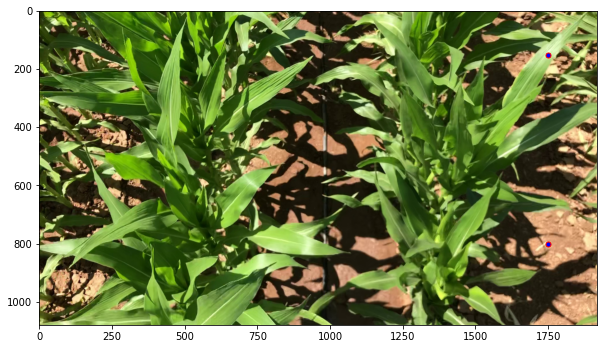

In [8]:
#Based on the Hue, Saturation and Value, we establish what a 'high' value is and what a 'low' value is. 
# this is done by manually looking into the pixels of the HSV image:
# let's take a look at the RGB plot
plt.figure( figsize = (10,20))
figurai = plt.gcf()
plt.imshow(transformada)
# we take a point that seems to be soil using the pixels as coordinates:
soilpoint = imagenHSV[800,1750]
# we take a point that seems to be crop using the pixels as coordinates:
croppoint = imagenHSV[150,1750]

# plot the points we chose on the image to make sure our guess was right 
plt.plot(1750, 800, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="blue")
plt.plot(1750, 150, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="blue")

print(str('the values of soil and crop are: ' + str(soilpoint) + ' and ' + str(croppoint)))

In [9]:
# Based on the values we just saw, and on additional points you can find, we determine thresholds
# between which we expect all green crop pixels to be
# since we see soil has low values for H, values under 100 for S, but no significant difference between the V 
# value, we define the following range

verdeBajo = np.array([35, 100, 20])
verdeAlto = np.array([75, 225, 255])

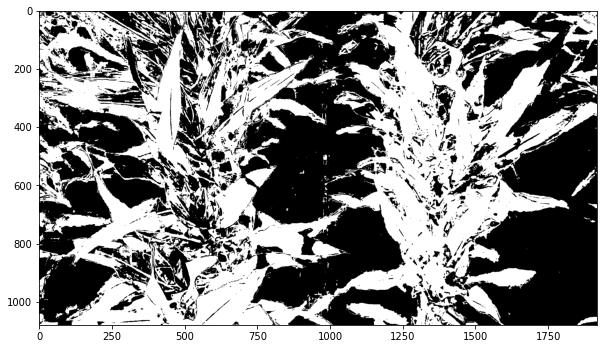

In [10]:
#We use these thresholds to create a mask of everything between the two values we just defined
maskverde = cv2.inRange(imagenHSV, verdeBajo, verdeAlto)
plt.figure( figsize = (10,20))
figurai = plt.gcf()
plt.imshow(maskverde, cmap=plt.cm.gray)
#figurai.savefig('T11_MASKARA.png')
# this mask has assigned a value of 1 to all 'green' pixels and a value of 0 to all non-green pixels

In [11]:
#We do see that we are missing some pixels in the shade in the above image, it is not perfect.
# let's see how many pixels we find that are green
npixelesverdes= cv2.countNonZero(maskverde)
print("The number of green pixels is: ", npixelesverdes)

The number of green pixels is:  983593


In [12]:
#so, let's now find the crop cover (CV)
CV = ((npixelesverdes)/area_imagen)*100
print("The area covered is "+ str(CV)+ " %")
print("The area covered is ", str(round(CV,2)) + " %")

# now that we have a segmented image, there are many things we can do. For example
# we can fly a drone over a field and estimage the amount of crop cover, to see if certain areas 
# are less productive. If you want to use this method to calculate LAI, we need to use ground sensors 
# to find the correlation between crop cover at certain growth stages and LAI (this isn't always eay)


The area covered is 47.43407600308642 %
The area covered is  47.43 %


**Exercise 2**. Let's use a machine vision algorithm to detect faces

In [18]:
#Get the image from the data directory
img = cv2.imread('/content/datos/image_2.jpg')
# load the pre-trained model (XML file)
face_cascade = cv2.CascadeClassifier('datos/pesos.xml')

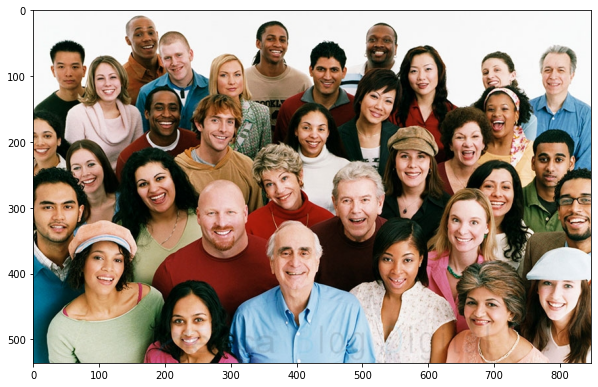

In [19]:
#transform from BGR to RGB
img_rgb = (cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.figure(figsize = (10,20))
plt.imshow(img_rgb)

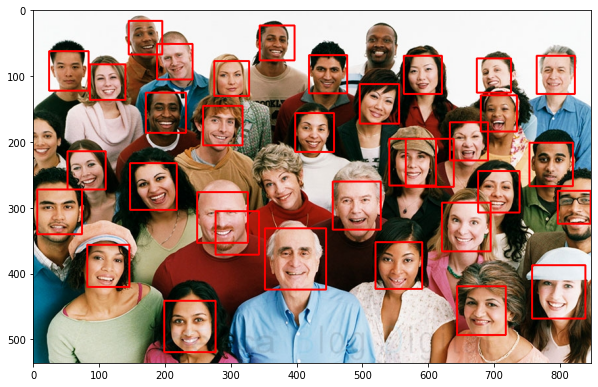

In [20]:
# convert to grayscale (no colour, only values)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# run the detection model ()
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# note that this is a multiscale detector, which is basically an algorithm that looks for 
# features in the image that are always there, no matter the resolution 
# for example, eyebrows will not really be present here if we would take the image from much further away, 
# but the round shape of the head will most likely remain

# draw bounding boxes over each detected face
for (x, y, w, h) in faces:
    cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (255, 0, 0), 2)
# plot/show the result
plt.figure( figsize = (10,20))
plt.imshow(img_rgb)

In [21]:
#we have the 'faces' variable, which contains the coordinates of each of the bounding boxes, 
# so let's now count the number of faces
print(faces)

[[344  23  53  53]
 [145  16  51  51]
 [188  51  54  54]
 [275  77  53  53]
 [ 86  82  54  54]
 [419  68  58  58]
 [563  69  58  58]
 [674  73  52  52]
 [ 24  62  60  60]
 [765  69  58  58]
 [680 129  55  55]
 [496 112  60  60]
 [171 125  61  61]
 [258 145  60  60]
 [633 170  58  58]
 [398 156  59  59]
 [754 201  66  66]
 [541 195  71  71]
 [ 52 214  58  58]
 [566 195  73  73]
 [147 232  71  71]
 [676 244  63  63]
 [455 260  73  73]
 [  6 272  68  68]
 [249 276  77  77]
 [797 274  50  50]
 [621 292  74  74]
 [277 305  66  66]
 [352 331  93  93]
 [520 352  71  71]
 [ 82 356  64  64]
 [758 387  81  81]
 [644 419  74  74]
 [199 441  78  78]]


In [22]:
print("how many faces have we detected: ",len(faces))

how many faces have we detected:  34
